# Exercise 1. #

Equation for F:
F = -alpha*beta*k_bar**(alpha - 1)/(k_bar - k_bar**alpha)

Equation for G:
G = alpha*beta*k_bar**(alpha - 2)*(alpha*k_bar + k_bar**alpha)/(k_bar - k_bar**alpha)

Equation for H:
H = -alpha**2*beta*k_bar**(2*alpha - 2)/(k_bar - k_bar**alpha)

Equation for L:
L = alpha*beta*k_bar**alpha/(k_bar - k_bar**alpha)

Equation for M:
M = -alpha*beta*k_bar**(2*alpha - 1)/(k_bar - k_bar**alpha)

Equation for N:
N = rho

Equation for P:
P = k_bar**(-alpha + 1)*(alpha*beta*k_bar**(alpha - 2)*(alpha*k_bar + k_bar**alpha) + (alpha**2*beta**2*(-4*alpha*k_bar**(3*alpha - 3) + k_bar**(2*alpha - 4)*(alpha*k_bar + k_bar**alpha)**2)/(k_bar - k_bar**alpha)**2)**0.5*(k_bar - k_bar**alpha))/(2*alpha*beta)

Equation for Q:
Q = 2*alpha*beta*(k_bar**alpha*rho - k_bar**(2*alpha - 1))/(-alpha*beta*k_bar**(alpha - 2)*(alpha*k_bar + k_bar**alpha) + 2*alpha*beta*k_bar**(alpha - 1)*rho + (alpha**2*beta**2*(-4*alpha*k_bar**(3*alpha - 3) + k_bar**(2*alpha - 4)*(alpha*k_bar + k_bar**alpha)**2)/(k_bar - k_b

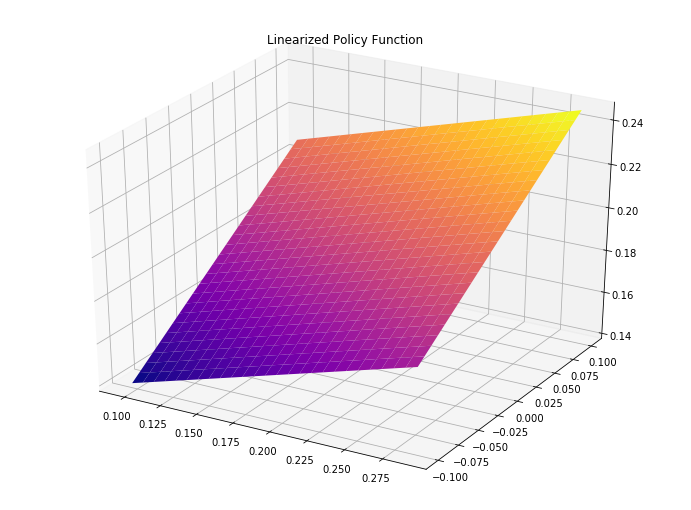

In [42]:
#Imports:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Parameter values:
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02

#Get steady state values:
k_bar = (alpha * beta) ** (1 / (1 - alpha))
z_bar = 0

#Get symbols:
k_double_prime = sy.symbols('k_double_prime')
k_prime = sy.symbols('k_prime')
k = sy.symbols('k')
z_prime = sy.symbols('z_prime')
z = sy.symbols('z')
alpha_sy = sy.symbols('alpha')
beta_sy = sy.symbols('beta')
rho_sy = sy.symbols('rho')
k_bar_sy = sy.symbols('k_bar')

#Define gamma function:
def gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy):
    numerator = beta_sy * alpha_sy * sy.exp(z_prime) * (k_prime ** (alpha_sy - 1)) * (sy.exp(z) * (k ** alpha_sy) - k_prime)
    denominator = sy.exp(z_prime) * (k_prime ** alpha_sy) - k_double_prime
    return numerator / denominator

#Get equations for F, G, H, L and M as symbolic derivatives evaluated at the steady state:
F_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), k_double_prime).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
G_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), k_prime).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
H_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), k).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
L_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), z_prime).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
M_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), z).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))

#Get equation for N:
N_eq = rho_sy

#Define P and Q in terms of F, G, H, L, M and N:
def get_P(F, G, H):
    return (-G - (G ** 2 - 4 * F * H) ** 0.5) / (2 * F)

def get_Q(F, G, H, L, M, N):
    return -(L * N + M) / (F * N + F * get_P(F, G, H) + G)

#Get equations for P and Q:
P_eq = sy.simplify(get_P(F_eq, G_eq, H_eq))
Q_eq = sy.simplify(get_Q(F_eq, G_eq, H_eq, L_eq, M_eq, N_eq))
    
print('Equation for F:\nF = {}\n\nEquation for G:\nG = {}\n\nEquation for H:\nH = {}\n\nEquation for L:\nL = {}\n\n'
      'Equation for M:\nM = {}\n\nEquation for N:\nN = {}\n\nEquation for P:\nP = {}\n\nEquation for Q:\nQ = {}\n'.format(F_eq, G_eq, H_eq, L_eq, M_eq, N_eq, P_eq, Q_eq))

#Get values for P and Q:
P = sy.lambdify((k_bar_sy, alpha_sy, beta_sy), P_eq)(k_bar, alpha, beta)
Q = sy.lambdify((k_bar_sy, alpha_sy, beta_sy, rho_sy), Q_eq)(k_bar, alpha, beta, rho)

#Get grids:
k_grid = np.linspace(0.5 * k_bar, 1.5 * k_bar, 26)
z_grid = np.linspace(-5 * sigma, 5 * sigma, 26)
H = np.zeros((26, 26))

#Define policy function:
def pf(k, z):
    return k_bar + P * (k - k_bar) + Q * z

#Update policy function grid:
for i in range(26): #loop over k indices
    for j in range(26): #loop over z indices
        H[i, j] = pf(k_grid[i], z_grid[j])

#Plot policy function:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(k_grid, z_grid)
ax.plot_surface(X, Y, H, cmap='plasma')
plt.title("Linearized Policy Function")
plt.show()

#Save H grid for Exercise 2:
H_old = H

# Exercise 2. #

Equation for F:
F = -1.0*alpha*beta*exp(k_bar)**alpha/(exp(k_bar) - exp(k_bar)**alpha)

Equation for G:
G = 1.0*alpha*beta*(alpha*exp(k_bar) + exp(k_bar)**alpha)*exp(-k_bar)*exp(k_bar)**alpha/(exp(k_bar) - exp(k_bar)**alpha)

Equation for H:
H = -1.0*alpha**2*beta*exp(-k_bar)*exp(k_bar)**(2*alpha)/(exp(k_bar) - exp(k_bar)**alpha)

Equation for L:
L = 1.0*alpha*beta*exp(k_bar)**alpha/(exp(k_bar) - exp(k_bar)**alpha)

Equation for M:
M = -1.0*alpha*beta*exp(-k_bar)*exp(k_bar)**(2*alpha)/(exp(k_bar) - exp(k_bar)**alpha)

Equation for N:
N = rho

Equation for P:
P = (0.5*alpha*beta*(alpha*exp(k_bar) + exp(k_bar)**alpha)*exp(k_bar)**alpha + 0.5*(alpha**2*beta**2*(-4.0*alpha*exp(k_bar)*exp(k_bar)**alpha + 1.0*(alpha*exp(k_bar) + exp(k_bar)**alpha)**2)*exp(-2*k_bar)*exp(k_bar)**(2*alpha)/(exp(k_bar) - exp(k_bar)**alpha)**2)**0.5*(-exp(k_bar) + exp(k_bar)**alpha)*exp(k_bar))*exp(-k_bar)*exp(k_bar)**(-alpha)/(alpha*beta)

Equation for Q:
Q = 1.0*alpha*beta*(-rho*exp(k_bar) + exp(k_bar)**alpha)*

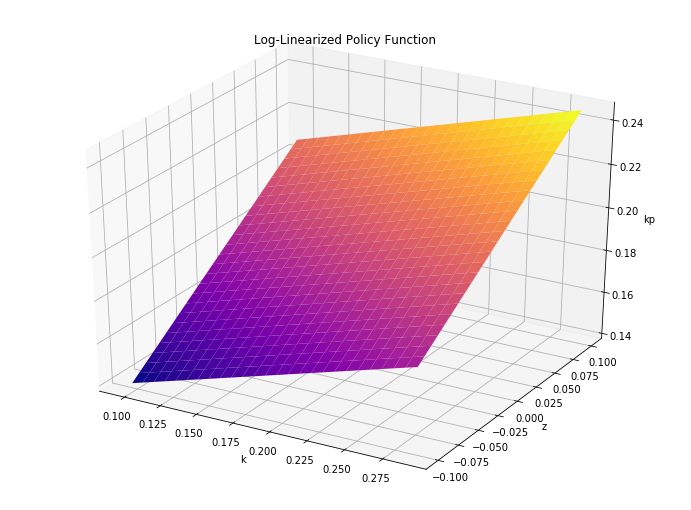

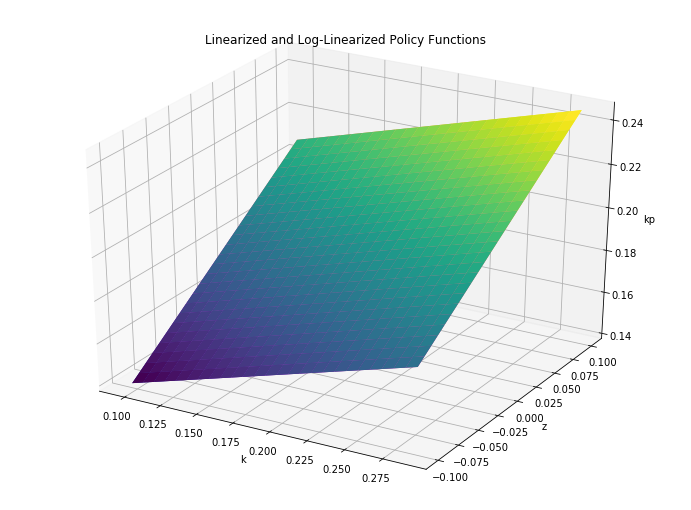

In [43]:
#Imports:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Parameter values:
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02

#Get steady state values:
k_bar = (alpha * beta) ** (1 / (1 - alpha))
z_bar = 0.0

#Get symbols:
k_double_prime = sy.symbols('k_double_prime')
k_prime = sy.symbols('k_prime')
k = sy.symbols('k')
z_prime = sy.symbols('z_prime')
z = sy.symbols('z')
alpha_sy = sy.symbols('alpha')
beta_sy = sy.symbols('beta')
rho_sy = sy.symbols('rho')
k_bar_sy = sy.symbols('k_bar')

#Define gamma function:
def gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy):
    numerator = beta_sy * alpha_sy * sy.exp(z_prime) * ((sy.exp(k_prime)) ** (alpha_sy - 1)) * (sy.exp(z) * ((sy.exp(k)) ** alpha_sy) - (sy.exp(k_prime)))
    denominator = sy.exp(z_prime) * ((sy.exp(k_prime)) ** alpha_sy) - (sy.exp(k_double_prime))
    return numerator / denominator

#Get equations for F, G, H, L and M as symbolic derivatives evaluated at the steady state:
F_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), k_double_prime).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
G_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), k_prime).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
H_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), k).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
L_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), z_prime).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
M_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), z).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))

#Get equation for N:
N_eq = rho_sy

#Define P and Q in terms of F, G, H, L, M and N:
def get_P(F, G, H):
    return (-G + (G ** 2 - 4 * F * H) ** 0.5) / (2 * F)

def get_Q(F, G, H, L, M, N):
    return -(L * N + M) / (F * N + F * get_P(F, G, H) + G)

#Get equations for P and Q:
P_eq = sy.simplify(get_P(F_eq, G_eq, H_eq))
Q_eq = sy.simplify(get_Q(F_eq, G_eq, H_eq, L_eq, M_eq, N_eq))
    
print('Equation for F:\nF = {}\n\nEquation for G:\nG = {}\n\nEquation for H:\nH = {}\n\nEquation for L:\nL = {}\n\n'
      'Equation for M:\nM = {}\n\nEquation for N:\nN = {}\n\nEquation for P:\nP = {}\n\nEquation for Q:\nQ = {}\n'.format(F_eq, G_eq, H_eq, L_eq, M_eq, N_eq, P_eq, Q_eq))

#Get values for P and Q:
P = sy.lambdify((k_bar_sy, alpha_sy, beta_sy), P_eq)(k_bar, alpha, beta)
Q = sy.lambdify((k_bar_sy, alpha_sy, beta_sy, rho_sy), Q_eq)(k_bar, alpha, beta, rho)

#Get grids:
k_grid = np.linspace(0.5 * k_bar, 1.5 * k_bar, 26)
z_grid = np.linspace(-5 * sigma, 5 * sigma, 26)
H = np.zeros((26, 26))

#Define policy function:
def pf(k, z):
    return k_bar * (P * ((k - k_bar) / k_bar) + Q * (z - z_bar)) + k_bar

#Update policy function grid:
for i in range(26): #loop over k indices
    for j in range(26): #loop over z indices
        H[i, j] = pf(k_grid[i], z_grid[j])

#Plot policy function:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(k_grid, z_grid)
ax.plot_surface(X, Y, H, cmap='plasma')
plt.title("Log-Linearized Policy Function")
ax.set_xlabel('k')
ax.set_ylabel('z')
ax.set_zlabel('kp')
plt.show()

#Plot both policy functions together:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(k_grid, z_grid)
ax.plot_surface(X, Y, H_old, cmap='viridis')
ax.plot_surface(X, Y, H, cmap='plasma')
plt.title("Linearized and Log-Linearized Policy Functions")
ax.set_xlabel('k')
ax.set_ylabel('z')
ax.set_zlabel('kp')
plt.show()

# Exercise 3. #

\begin{align*}
E_{t}\left\{F\tilde{X}_{t + 1} + G\tilde{X}_{t} + H\tilde{X}_{t - 1} + L\tilde{Z}_{t + 1} + M\tilde{Z}_{t}\right\} &= E_{t}\left\{F(P(P\tilde{X}_{t - 1} + Q\tilde{Z}_{t}) + Q(N\tilde{Z}_{t} + \epsilon_{t + 1})) + G(P\tilde{X}_{t - 1} + Q\tilde{Z}_{t}) + H\tilde{X}_{t - 1} + L(N\tilde{Z}_{t} + \epsilon_{t + 1}) + M\tilde{Z}_{t}\right\} \\
&= E_{t}\left\{FPP\tilde{X}_{t - 1} + FPQ\tilde{Z}_{t} + FQN\tilde{Z}_{t} + FQ\epsilon_{t + 1} + GP\tilde{X}_{t - 1} + GQ\tilde{Z}_{t} + H\tilde{X}_{t - 1} + LN\tilde{Z}_{t} + L\epsilon_{t + 1} + M\tilde{Z}_{t}\right\} \\
&= E_{t}\left\{FPP\tilde{X}_{t - 1} + GP\tilde{X}_{t - 1} + H\tilde{X}_{t - 1} + FPQ\tilde{Z}_{t} + FQN\tilde{Z}_{t} + GQ\tilde{Z}_{t} + LN\tilde{Z}_{t} + M\tilde{Z}_{t} + FQ\epsilon_{t + 1} + L\epsilon_{t + 1}\right\} \\
&= E_{t}\left\{((FP + G)P + H)\tilde{X}_{t - 1} + ((FQ + L)N + (FP + G)Q + M)\tilde{Z}_{t} + (FQ + L)\epsilon_{t + 1}\right\} \\
&= E_{t}\left\{((FP + G)P + H)\tilde{X}_{t - 1} + ((FQ + L)N + (FP + G)Q + M)\tilde{Z}_{t}\right\} + E_{t}\left\{(FQ + L)\epsilon_{t + 1}\right\} \\
&= ((FP + G)P + H)\tilde{X}_{t - 1} + ((FQ + L)N + (FP + G)Q + M)\tilde{Z}_{t}
\end{align*}

# Exercise 4. #

In [44]:
#Imports:
import numpy as np
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

#Model parameter values:
gamma = 2.5
xi = 1.5
beta = 0.98
alpha = 0.4
a = 0.5
delta = 0.1
z_bar = 0.0
tau = 0.05
params = np.array([gamma, xi, beta, alpha, a, delta, z_bar, tau])
rho = 0.9
sigma = 0.02

#LinApp parameter values:
Zbar = np.array([z_bar])
nx = 1
ny = 1
nz = 1
logX = 0
Sylv = 0

#Define Modeldefs and Modeldyn:
def Modeldefs(kp, k, l, z, params):
    gamma, xi, beta, alpha, a, delta, z_bar, tau = params
    w = (1 - alpha) * np.exp(z) * ((k / (l * np.exp(z))) ** alpha)
    r = alpha * (((l * np.exp(z)) / k) ** (1 - alpha))
    T = tau * (w * l + (r - delta) * k)
    c = (1 - tau) * (w * l + (r - delta) * k) + k + T - kp
    y = (k ** alpha) * (l * np.exp(z) ** (1 - alpha))
    i = kp - (1 - delta) * k
    return np.array([w, r, T, c, y, i])

def Modeldyn(theta0, params):
    gamma, xi, beta, alpha, a, delta, z_bar, tau = params
    kpp, kp, k, lp, l, zp, z = theta0
    w, r, T, c, y, i = Modeldefs(kp, k, l, z, params)
    wp, rp, Tp, cp, yp, ip = Modeldefs(kpp, kp, lp, zp, params)
    E1 = cp - (beta * c * ((rp - delta) * (1 - tau) + 1))
    E2 = a * (c ** gamma) - ((1 - l) ** xi) * (w * (1 - tau))
    return np.array([E1, E2])

#Take a guess for steady state values of k and l:
guessXY = np.array([1.0, 0.5])

#Define a function that gets all of the steady state values:
def get_SS_vals(Modeldyn, params, guessXY, Zbar, nx, ny):
    k_bar, l_bar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
    w_bar, r_bar, T_bar, c_bar, y_bar, i_bar = Modeldefs(k_bar, k_bar, l_bar, z_bar, params)
    return np.array([k_bar, l_bar, w_bar, r_bar, T_bar, c_bar, y_bar, i_bar])

#Print all the steady state values:
SS_vals = get_SS_vals(Modeldyn, params, guessXY, Zbar, nx, ny)
k_bar, l_bar, w_bar, r_bar, T_bar, c_bar, y_bar, i_bar = SS_vals
print('\nk_bar: ', k_bar, '\nl_bar: ', l_bar, '\nw_bar: ', w_bar, '\nr_bar: ', r_bar, '\nT_bar: ', T_bar, '\nc_bar: ', c_bar, '\ny_bar: ', y_bar, '\ni_bar: ', i_bar)



k_bar:  4.22522902679 
l_bar:  0.579791453167 
w_bar:  1.32795276835 
r_bar:  0.121482277121 
T_bar:  0.0430351603077 
c_bar:  0.860703206155 
y_bar:  1.03183893397 
i_bar:  0.422522902679


# Exercise 5. #

In [45]:
def get_deriv_matrix(SS_vals, Modeldyn, params, guessXY, Zbar, nx, ny):
    deriv_matrix = np.empty((8, 8))
    epsilon = 1e-10
    epsilon_matrix = epsilon * np.identity(8)
    for i in range(8): #loop over x
        new_SS_vals = get_SS_vals(Modeldyn, params + epsilon_matrix[i], guessXY, Zbar, nx, ny)
        for j in range(8): #loop over y
            deriv_matrix[i, j] = (new_SS_vals[j] - SS_vals[j]) / epsilon
    return deriv_matrix

print(get_deriv_matrix(SS_vals, Modeldyn, params, guessXY, Zbar, nx, ny))

[[  1.38671297e-01   1.90325533e-02  -4.44089210e-06   4.16333634e-07
    1.41255063e-03   2.82529555e-02   4.74176254e-02   1.38689060e-02]
 [ -8.01607669e-01  -1.10003118e-01   4.44089210e-06  -6.93889390e-07
   -8.16499646e-03  -1.63309366e-01  -2.74074097e-01  -8.01581024e-02]
 [  6.54305232e+01   2.60150790e-01   7.98735966e+00  -1.09603604e+00
    8.75531592e-02   1.75106152e+00   6.85447255e+00   6.54305499e+00]
 [  2.59849831e+01  -7.69379005e-01   4.39588588e+00  -1.11022302e-06
    1.04260489e-01   2.08520312e+00   2.65601985e+00   2.59849919e+00]
 [ -1.84930293e+00  -2.53758126e-01  -6.66133815e-06   5.55111512e-07
   -1.88354193e-02  -3.76711995e-01  -6.32254249e-01  -1.84927629e-01]
 [ -4.83499107e+01   1.31977651e+00  -7.28750837e+00   1.00000119e+00
   -1.75564771e-01  -3.51129792e+00  -2.37422304e+00  -6.09761130e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -2.3232615

# Exercise 6. #

In [46]:
#Imports:
import numpy as np
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

#Model parameter values:
gamma = 2.5
xi = 1.5
beta = 0.98
alpha = 0.4
a = 0.5
delta = 0.1
z_bar = 0.0
tau = 0.05
params = np.array([gamma, xi, beta, alpha, a, delta, z_bar, tau])
rho = 0.9
sigma = 0.02

#LinApp parameter values:
Zbar = np.array([z_bar])
nx = 2
ny = 0
nz = 1
logX = 1
Sylv = 0

#Define Modeldefs and Modeldyn:
def Modeldefs(kp, k, l, z, params):
    gamma, xi, beta, alpha, a, delta, z_bar, tau = params
    w = (1 - alpha) * np.exp(z) * ((k / (l * np.exp(z))) ** alpha)
    r = alpha * (((l * np.exp(z)) / k) ** (1 - alpha))
    T = tau * (w * l + (r - delta) * k)
    c = (1 - tau) * (w * l + (r - delta) * k) + k + T - kp
    y = (k ** alpha) * (l * np.exp(z) ** (1 - alpha))
    i = kp - (1 - delta) * k
    return np.array([w, r, T, c, y, i])

def Modeldyn(theta0, params):
    gamma, xi, beta, alpha, a, delta, z_bar, tau = params
    kpp, lp, kp, l, k, _, zp, z = theta0
    w, r, T, c, y, i = Modeldefs(kp, k, l, z, params)
    wp, rp, Tp, cp, yp, ip = Modeldefs(kpp, kp, lp, zp, params)
    E1 = beta * (cp / c) ** (-gamma) * ((rp - delta) * (1 - tau) + 1) - 1
    E2 = a * (c ** gamma) - ((1 - l) ** xi) * (w * (1 - tau))
    return np.array([E1, E2])

#Take a guess for steady state values of k and l:
guessXY = np.array([1.0, 0.5])

#Define a function that gets all of the steady state values:
def get_SS_vals(Modeldyn, params, guessXY, Zbar, nx, ny):
    k_bar, l_bar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
    w_bar, r_bar, T_bar, c_bar, y_bar, i_bar = Modeldefs(k_bar, k_bar, l_bar, z_bar, params)
    return np.array([k_bar, l_bar, w_bar, r_bar, T_bar, c_bar, y_bar, i_bar])

#Print all the steady state values:
SS_vals = get_SS_vals(Modeldyn, params, guessXY, Zbar, nx, ny)
k_bar, l_bar, w_bar, r_bar, T_bar, c_bar, y_bar, i_bar = SS_vals
print('\nk_bar: ', k_bar, '\nl_bar: ', l_bar, '\nw_bar: ', w_bar, '\nr_bar: ', r_bar, '\nT_bar: ', T_bar, '\nc_bar: ', c_bar, '\ny_bar: ', y_bar, '\ni_bar: ', i_bar)

#Find the derivatives matrices:
theta0 = np.array([k_bar, l_bar, k_bar, l_bar, k_bar, l_bar, z_bar, z_bar])
A, B, C, D, F, G, H, J, K, L, M, W, T = LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)
print('F: ', F)
print('G: ', G)
print('H: ', H)
print('L: ', L)
print('M: ', M)

#Set value for N:
N = np.array([rho])
    
#Find the policy function coefficients:
P, Q, U, R, S, V = LinApp_Solve(A, B, C, D, F, G, H, J, K, L, M, W, T, N, Zbar, Sylv)
print('N:', N)
print('P:',P)
print('Q', Q)


k_bar:  4.22522902678 
l_bar:  0.579791453167 
w_bar:  1.32795276835 
r_bar:  0.121482277121 
T_bar:  0.0430351603077 
c_bar:  0.860703206154 
y_bar:  1.03183893397 
i_bar:  0.422522902678
F:  [[ 12.27260744  -2.16849645]
 [  0.           0.        ]]
G:  [[-24.87671844   2.23635645]
 [ -4.21735732   1.61717358]]
H:  [[ 12.53625099   0.        ]
 [  4.17049981   0.        ]]
L:  [[-2.16849645]
 [ 0.        ]]
M:  [[ 2.23635645]
 [ 0.56231733]]
N: [ 0.9]
P: [[ 0.91529369  0.        ]
 [-0.19192699  0.        ]]
Q [[ 0.12899709]
 [-0.01131016]]


# Exercise 7. #

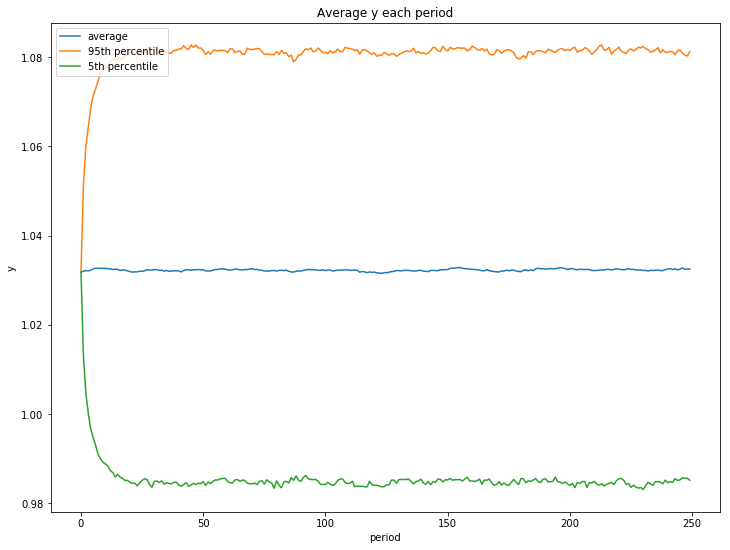

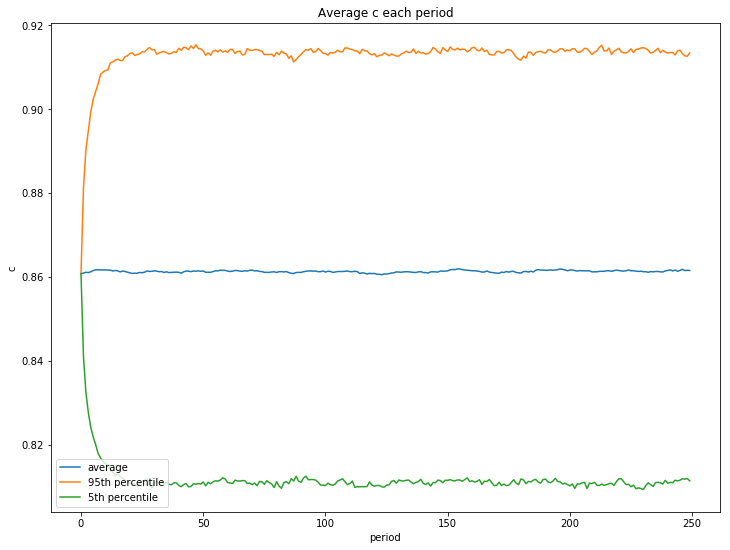

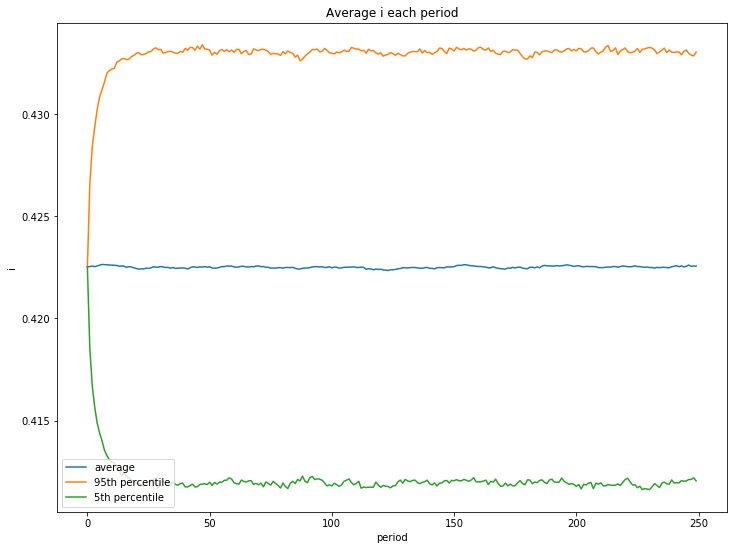

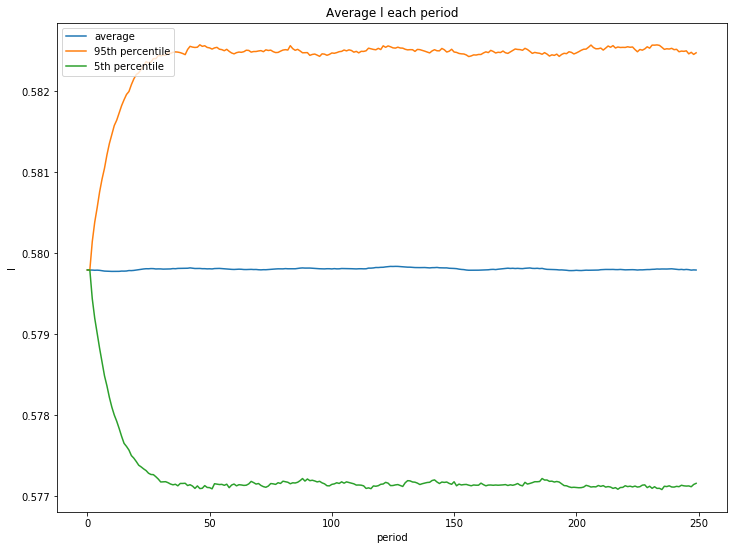

In [47]:
#Imports:
import numpy as np
from numpy.random import uniform

#Define empty arrays for time-series:
k_arr = np.empty((251, 10000))
l_arr = np.empty((251, 10000))
z_arr = np.empty((251, 10000))
y_arr = np.empty((251, 10000))
c_arr = np.empty((251, 10000))
i_arr = np.empty((251, 10000))

#Define initial values for time-series:
k_arr[0, :] = k_bar * np.ones(10000)
l_arr[0, :] = l_bar * np.ones(10000)
z_arr[0, :] = z_bar * np.ones(10000)

#Get upper and lower bounds for uniform distribution:
ub = (12 * (sigma ** 2)) ** 0.5 / 2
lb = -ub

#Define (vector inputs) policy function:
def pf(k, l, z):
    X = np.array([k, l])
    one_vec = np.ones(k.shape[0])
    X_bar = np.array([k_bar * one_vec, l_bar * one_vec])
    return X_bar * np.exp(P@(np.log(X / X_bar))) + Q * (z - z_bar)

#Run simulations:
for i in range(1, 251):
    k_arr[i, :], l_arr[i, :] = pf(k_arr[i - 1, :], l_arr[i - 1, :], z_arr[i - 1, :])
    z_arr[i, :] = (1 - rho) * z_bar + rho * z_arr[i - 1, :] + uniform(lb, ub, 10000)
    c_arr[i - 1, :], y_arr[i - 1, :], i_arr[i - 1, :] = Modeldefs(k_arr[i, :], k_arr[i - 1, :], l_arr[i - 1, :], z_arr[i - 1, :], params)[-3:]

#Plot GDP:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(250), np.average(y_arr[:-1, :], 1), label='average')
band_95 = np.array([sorted(y_arr[i, :])[9500] for i in range(250)])
band_5 = np.array([sorted(y_arr[i, :])[500] for i in range(250)])
plt.plot(range(250), band_95, label='95th percentile')
plt.plot(range(250), band_5, label='5th percentile')
plt.title('Average y each period')
plt.xlabel('period')
plt.ylabel('y')
plt.legend()
plt.show()

#Plot consumption:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(250), np.average(c_arr[:-1, :], 1), label='average')
band_95 = np.array([sorted(c_arr[i, :])[9500] for i in range(250)])
band_5 = np.array([sorted(c_arr[i, :])[500] for i in range(250)])
plt.plot(range(250), band_95, label='95th percentile')
plt.plot(range(250), band_5, label='5th percentile')
plt.title('Average c each period')
plt.xlabel('period')
plt.ylabel('c')
plt.legend()
plt.show()

#Plot investment:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(250), np.average(i_arr[:-1, :], 1), label='average')
band_95 = np.array([sorted(i_arr[i, :])[9500] for i in range(250)])
band_5 = np.array([sorted(i_arr[i, :])[500] for i in range(250)])
plt.plot(range(250), band_95, label='95th percentile')
plt.plot(range(250), band_5, label='5th percentile')
plt.title('Average i each period')
plt.xlabel('period')
plt.ylabel('i')
plt.legend()
plt.show()

#Plot labor:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(250), np.average(l_arr[:-1, :], 1), label='average')
band_95 = np.array([sorted(l_arr[i, :])[9500] for i in range(250)])
band_5 = np.array([sorted(l_arr[i, :])[500] for i in range(250)])
plt.plot(range(250), band_95, label='95th percentile')
plt.plot(range(250), band_5, label='5th percentile')
plt.title('Average l each period')
plt.xlabel('period')
plt.ylabel('l')
plt.legend()
plt.show()

# Exercise 8. #

In [48]:
#Imports:
from scipy.stats import sem

#Define a list of series, a list of series labels, and an empty array of moments:
series_list = [k_arr, l_arr, z_arr, y_arr, c_arr, i_arr]
series_labels = ['k series', 'l series', 'z series', 'y series', 'c series', 'i series']
moments_arr = np.empty((6, 10000, 6))

#Put moments in the moments array:
def get_moments():
    for i in range(6):
        for j in range(10000):
            simulation = series_list[i][:, j]
            moments_arr[i, j, 0] = simulation.mean()
            moments_arr[i, j, 1] = simulation.std()
            moments_arr[i, j, 2] = moments_arr[i, j, 0] / moments_arr[i, j, 1]
            moments_arr[i, j, 3] = moments_arr[i, j, 1] / y_arr[:, j].std()
            moments_arr[i, j, 4] = np.correlate(simulation, simulation)
            moments_arr[i, j, 5] = np.correlate(simulation, y_arr[:, j])

get_moments()

In [49]:
#Report average values and standard errors:
moments_avg_arr = np.average(moments_arr, 1)
moments_sem_arr = sem(moments_arr, 1)

for i in range(6):
    print('{} average moments: '.format(series_labels[i]), moments_avg_arr[i, :])
    print('{} standard errors of moments: '.format(series_labels[i]), moments_sem_arr[i, :], '\n')

k series average moments:  [  4.22507551e+00   4.09675932e-02   1.08672834e+02   2.59300291e-01
   4.48119358e+03   1.09078554e+03]
k series standard errors of moments:  [  1.82397845e-04   9.31626743e-05   2.56275416e-01   3.17885583e-03
   3.86793739e-01   3.21306047e-01] 

l series average moments:  [  5.79802678e-01   1.42296673e-03   4.27539318e+02   9.00815098e-03
   8.43795862e+01   1.49647659e+02]
l series standard errors of moments:  [  6.18599523e-06   3.11397781e-06   9.60707220e-01   1.10215670e-04
   1.80064465e-03   4.13208416e-02] 

z series average moments:  [  5.50267258e-05   4.33716119e-02   9.46717601e-04   2.75196567e-01
   5.18824751e-01   3.42919956e-01]
z series standard errors of moments:  [  1.23995509e-04   5.67458067e-05   2.92930818e-03   3.32332799e-03
   1.38394287e-03   3.22839687e-02] 

y series average moments:  [   1.02835103    0.35480562    6.57853303    1.          313.99897218
  313.99897218]
y series standard errors of moments:  [  2.86956860e-04

# Exercise 9. #

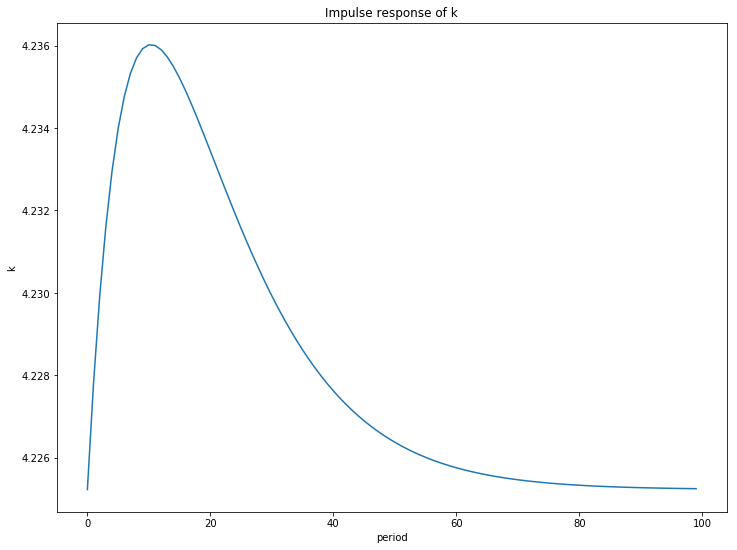

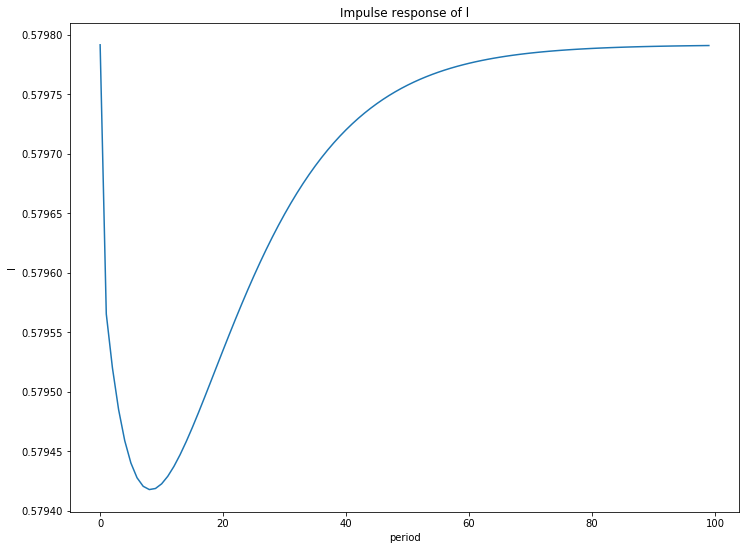

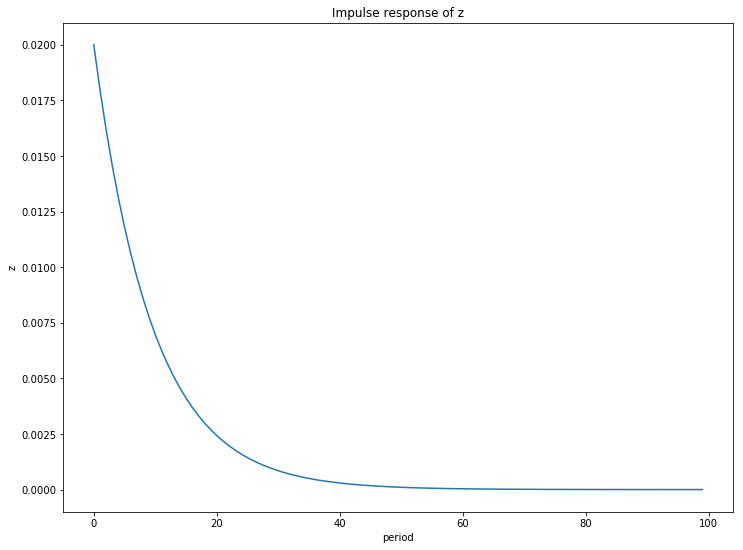

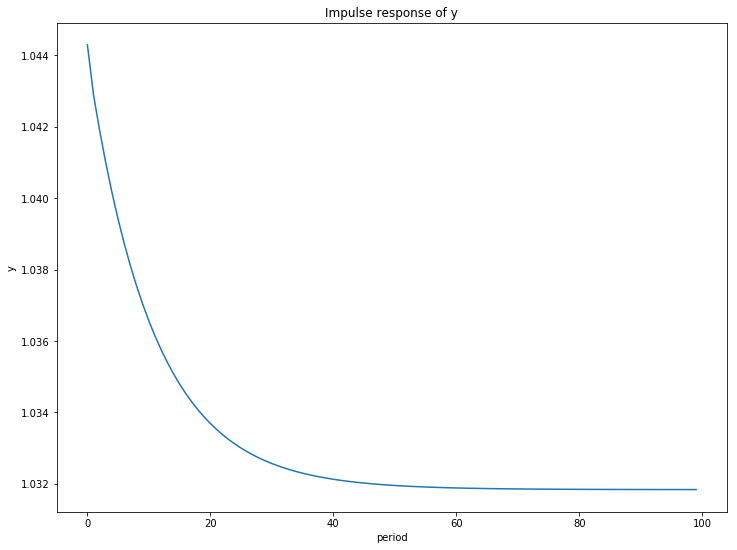

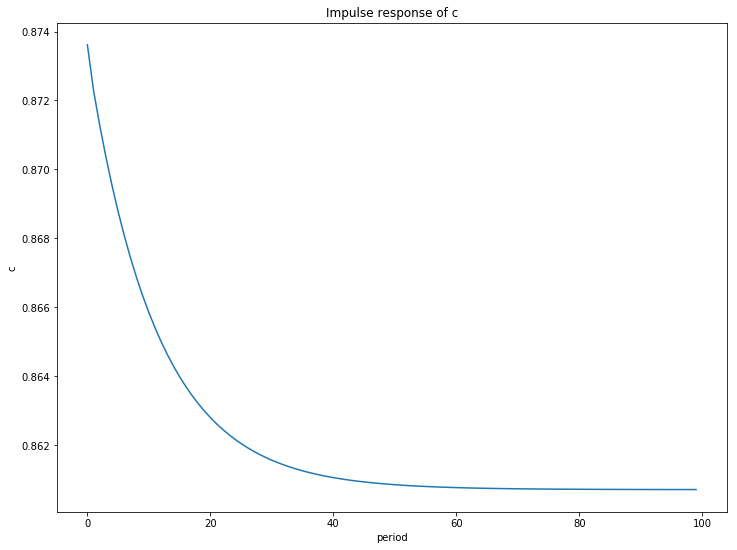

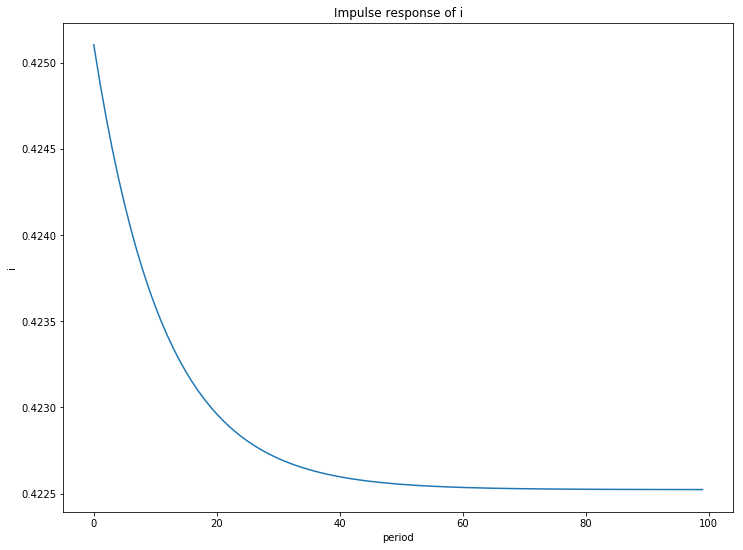

In [50]:
#Imports:
import numpy as np

#Define empty arrays for time-series (100 periods seemed more illustrative than 40):
k_vec = np.empty(101)
l_vec = np.empty(101)
z_vec = np.empty(101)
y_vec = np.empty(101)
c_vec = np.empty(101)
i_vec = np.empty(101)

#Define initial values for time-series:
k_vec[0] = k_bar
l_vec[0] = l_bar
z_vec[0] = z_bar + 0.02

#Define (scalar inputs) policy function:
def pf(k, l, z):
    X = np.array([k, l])
    X_bar = np.array([k_bar, l_bar])
    return X_bar * np.exp(P@(np.log(X / X_bar))) + np.concatenate(Q * (z - z_bar))

#Run simulations:
for i in range(1, 101):
    k_vec[i], l_vec[i] = pf(k_vec[i - 1], l_vec[i - 1], z_vec[i - 1])
    z_vec[i] = (1 - rho) * z_bar + rho * z_vec[i - 1]
    c_vec[i - 1], y_vec[i - 1], i_vec[i - 1] = Modeldefs(k_vec[i], k_vec[i - 1], l_vec[i - 1], z_vec[i - 1], params)[-3:]

#Plot impulse response of capital:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(100), k_vec[:-1])
plt.title('Impulse response of k')
plt.xlabel('period')
plt.ylabel('k')
plt.show()

#Plot impulse response of labor:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(100), l_vec[:-1])
plt.title('Impulse response of l')
plt.xlabel('period')
plt.ylabel('l')
plt.show()

#Plot impulse response of z:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(100), z_vec[:-1])
plt.title('Impulse response of z')
plt.xlabel('period')
plt.ylabel('z')
plt.show()

#Plot impulse response of GDP:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(100), y_vec[:-1])
plt.title('Impulse response of y')
plt.xlabel('period')
plt.ylabel('y')
plt.show()

#Plot impulse response of consumption:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(100), c_vec[:-1])
plt.title('Impulse response of c')
plt.xlabel('period')
plt.ylabel('c')
plt.show()

#Plot impulse response of investment:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(100), i_vec[:-1])
plt.title('Impulse response of i')
plt.xlabel('period')
plt.ylabel('i')
plt.show()

# Exercise 10. #

In [8]:
#Imports:
import numpy as np
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
import matplotlib.pyplot as plt

#Parameter values:
alpha = 0.35
beta = 0.442
nvec = np.array([1.0,1.0,0.2])
sigma = 3
yrs_live = 60
s = 3
delta_annual = 0.05
delta = 1 - ((1 - delta_annual) ** (yrs_live / s))
z_bar = 0.0
params = (alpha, beta, nvec, sigma, delta)

#LinApp parameter values:
nx = 2
ny = 0
nz = 1
Zbar = np.array([0.0])
logX = 1
Sylv = 0

#Define Modeldefs and Modeldyn:
def Modeldefs(k2, k3, l, z, params):
    alpha, beta, nvec, sigma, delta = params
    k = k2 + k3
    r = alpha * np.exp(z) * ((l / k) ** (1 - alpha)) - delta
    w = (1 - alpha) * np.exp(z) * ((k / l) ** alpha)
    return np.array([k, r, w])

def Modeldyn(theta0, params):
    alpha, beta, nvec, sigma, delta = params
    k2pp, k3pp, k2p, k3p, k2, k3, zp, z = theta0
    kpp = k2pp + k3pp
    l = np.sum(nvec)
    kp, rp, wp = Modeldefs(k2p, k3p, l, zp, params)
    k, r, w = Modeldefs(k2, k3, l, z, params)
    c1 = w * nvec[0] - k2p
    c2 = (1 + r) * k2 + w * nvec[1] - k3p
    c2p = (1 + rp) * k2p + wp * nvec[1] - k3pp
    c3p = (1 + rp) * k3p + wp * nvec[2]
    E1 = c1 ** (-sigma) - beta * (1 + rp) * c2p ** (-sigma)
    E2 = c2 ** (-sigma) - beta * (1 + rp) * c3p ** (-sigma)
    return np.array([E1, E2])

#Take a guess for steady state values of k2 and k3:
guessXY = np.array([.02, .04])

#Get the steady state values of k2 and k3:
k2_bar, k3_bar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)

#Print the steady state values of k2 and k3:
print('k2_bar: ', k2_bar, '\nk3_bar: ', k3_bar)

#Find the derivatives matrices:
theta0 = np.array([k2_bar, k3_bar, k2_bar, k3_bar, k2_bar, k3_bar, z_bar, z_bar])
A, B, C, D, F, G, H, J, K, L, M, W, T = LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)
print('F: ', F)
print('G: ', G)
print('H: ', H)
print('L: ', L)
print('M: ', M)

#Set value for N:
N = np.array([1.0])
    
#Find the policy function coefficients:
P, Q, U, R, S, V = LinApp_Solve(A, B, C, D, F, G, H, J, K, L, M, W, T, N, Zbar, Sylv)
print('N:', N)
print('P:',P)
print('Q', Q)

k2_bar:  0.0193125457386 
k3_bar:  0.0584111733061
F:  [[   0.         -137.73185791]
 [   0.            0.        ]]
G:  [[ 251.2494762   128.79794953]
 [ -18.77382012  305.15817507]]
H:  [[ -47.53559541 -143.77234049]
 [-115.38715412  -37.38011659]]
L:  [[ 468.12086235]
 [ 200.17478582]]
M:  [[-546.59409199]
 [-405.73953902]]
N: [ 1.]
P: [[ 0.03530495  0.63635142]
 [ 0.38029446  0.16164359]]
Q [[ 0.5051438]
 [ 0.7047107]]


In [31]:
#Get empty time path vectors:
k2_vec = np.empty(15)
k3_vec = np.empty(15)

#Get initial values:
k2_vec[0] = np.log(0.8)
k3_vec[0] = np.log(1.1)

#Update vectors:
for i in range(1, 15):
    k2_vec[i], k3_vec[i] = P@np.array([k2_vec[i - 1], k3_vec[i - 1]])
k2_vec = k2_bar * np.exp(k2_vec) 
k3_vec = k3_bar * np.exp(k3_vec) 
k_vec = k2_vec + k3_vec

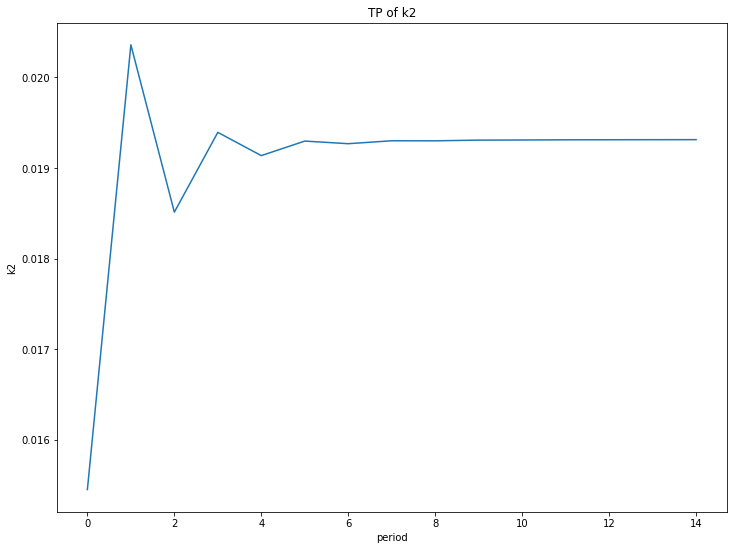

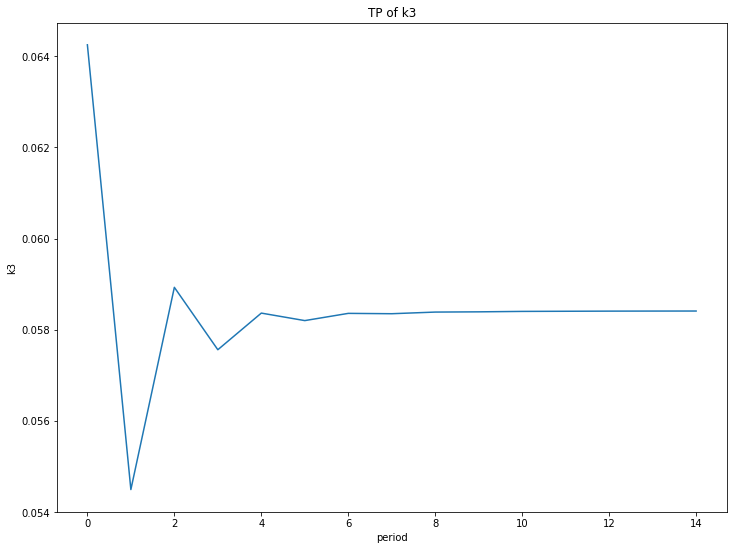

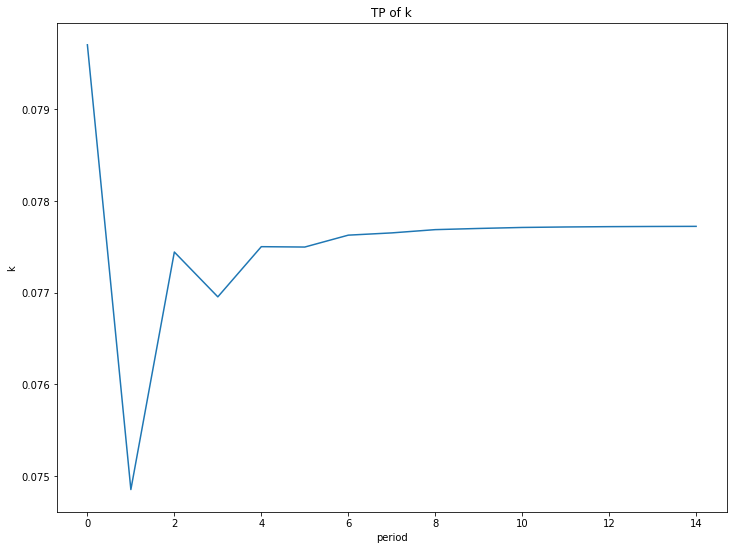

In [34]:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(0, 15), k2_vec)
plt.title('TP of k2')
plt.xlabel('period')
plt.ylabel('k2')
plt.show()
fig = plt.figure(figsize=(12, 9))
plt.plot(range(0, 15), k3_vec)
plt.title('TP of k3')
plt.xlabel('period')
plt.ylabel('k3')
plt.show()
fig = plt.figure(figsize=(12, 9))
plt.plot(range(0, 15), k_vec)
plt.title('TP of k')
plt.xlabel('period')
plt.ylabel('k')
plt.show()

We seem to be sacrificing accuracy in favor of speed.

In [35]:
#New parameter values:
rho = 0.9 ** 20
sigma = 0.02

#Find derivatives again:
A, B, C, D, F, G, H, J, K, L, M, W, T = LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)
print('F: ', F)
print('G: ', G)
print('H: ', H)
print('L: ', L)
print('M: ', M)

#Set value for N:
N = np.array([rho])
    
#Find the policy function coefficients:
P, Q, U, R, S, V = LinApp_Solve(A, B, C, D, F, G, H, J, K, L, M, W, T, N, Zbar, Sylv)
print('N:', N)
print('P:',P)
print('Q', Q)

F:  [[   0.         -137.73185791]
 [   0.            0.        ]]
G:  [[ 251.2494762   128.79794953]
 [ -18.77382012  305.15817507]]
H:  [[ -47.53559541 -143.77234049]
 [-115.38715412  -37.38011659]]
L:  [[ 468.12086235]
 [ 200.17478582]]
M:  [[-546.59409199]
 [-405.73953902]]
N: [ 0.12157665]
P: [[ 0.03530495  0.63635142]
 [ 0.38029446  0.16164359]]
Q [[ 1.84670944]
 [ 1.36346584]]


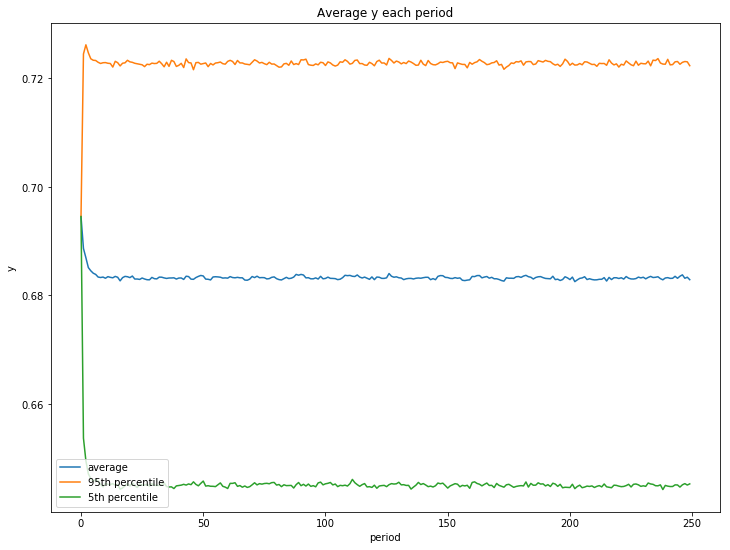

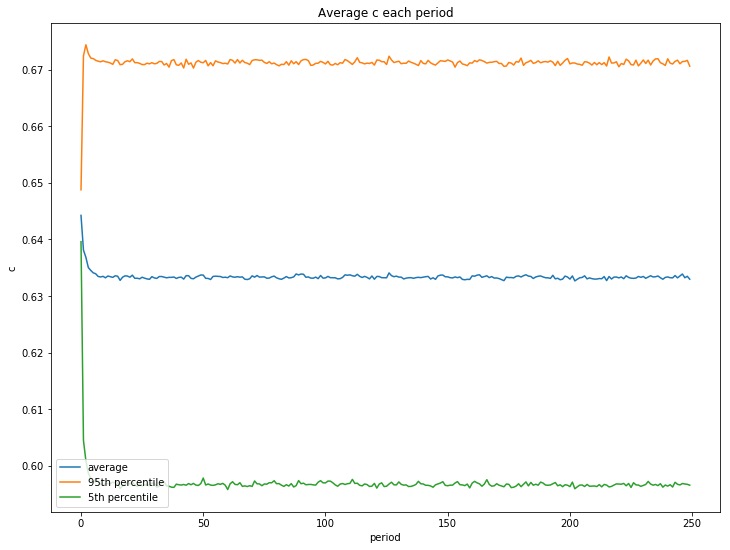

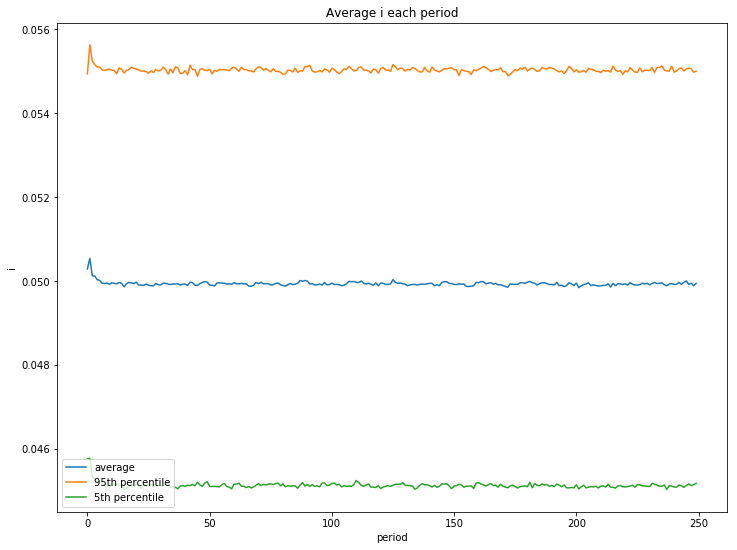

In [64]:
#Get empty arrays:
k2_arr = np.empty((251, 10000))
k3_arr = np.empty((251, 10000))
k_arr = np.empty((251, 10000))
z_arr = np.empty((251, 10000))
c_arr = np.empty((251, 10000))
y_arr = np.empty((251, 10000))
i_arr = np.empty((251, 10000))

#Get initial values:
k2_arr[0, :] = k2_bar * np.ones(10000)
k3_arr[0, :] = k3_bar * np.ones(10000)
k_arr[0, :] = (k2_bar + k3_bar) * np.ones(10000)
z_arr[0, :] = z_bar * np.ones(10000)

#Update the k2, k3, k, and z arrays:
for i in range(1, 251):
    z_arr[i, :] = (1 - rho) * z_bar + rho * z_arr[i - 1, :] + uniform(lb, ub, 10000)
    k2_arr[i, :] = P[0, 0] * k2_arr[i-1, :] + P[0, 1] * k3_arr[i-1, :] + Q[0] * z_arr[i, :]
    k3_arr[i, :] = P[1, 0] * k2_arr[i-1, :] + P[1, 1] * k3_arr[i-1, :] + Q[0] * z_arr[i, :]
k2_arr = k2_bar * np.exp(k2_arr)
k3_arr = k3_bar * np.exp(k3_arr)
k_arr, r_arr, w_arr = Modeldefs(k2_arr, k3_arr, np.sum(nvec), z_arr, params)

for i in range(250):
    y_arr[i, :] = k_arr[i, :] ** alpha * np.sum(nvec) ** (1 - alpha) * np.exp(z_arr[i, :])
    i_arr[i, :] = k_arr[i + 1, :] - (1 - delta) * k_arr[i, :]
    c_arr[i, :] = w_arr[i, :] - k2_arr[i + 1, :] + w_arr[i, :] + (1 + r_arr[i, :]) * k2_arr[i, :] - k3_arr[i + 1, :] + w_arr[i, :] * 0.2 + (1 + r_arr[i, :]) * k3_arr[i, :]

#Plot GDP:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(250), np.average(y_arr[:-1, :], 1), label='average')
band_95 = np.array([sorted(y_arr[i, :])[9500] for i in range(250)])
band_5 = np.array([sorted(y_arr[i, :])[500] for i in range(250)])
plt.plot(range(250), band_95, label='95th percentile')
plt.plot(range(250), band_5, label='5th percentile')
plt.title('Average y each period')
plt.xlabel('period')
plt.ylabel('y')
plt.legend()
plt.show()

#Plot consumption:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(250), np.average(c_arr[:-1, :], 1), label='average')
band_95 = np.array([sorted(c_arr[i, :])[9500] for i in range(250)])
band_5 = np.array([sorted(c_arr[i, :])[500] for i in range(250)])
plt.plot(range(250), band_95, label='95th percentile')
plt.plot(range(250), band_5, label='5th percentile')
plt.title('Average c each period')
plt.xlabel('period')
plt.ylabel('c')
plt.legend()
plt.show()

#Plot investment:
fig = plt.figure(figsize=(12, 9))
plt.plot(range(250), np.average(i_arr[:-1, :], 1), label='average')
band_95 = np.array([sorted(i_arr[i, :])[9500] for i in range(250)])
band_5 = np.array([sorted(i_arr[i, :])[500] for i in range(250)])
plt.plot(range(250), band_95, label='95th percentile')
plt.plot(range(250), band_5, label='5th percentile')
plt.title('Average i each period')
plt.xlabel('period')
plt.ylabel('i')
plt.legend()
plt.show()